In [9]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import spacy
import re
import string
import collections
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Embedding, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, LSTM, Bidirectional, Dense, BatchNormalization, Dropout
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv(r'C:\\Users\\Thomas\\Desktop\\Anvendt maskinlæring\\exam\\df_bluesky.csv')

In [ ]:
print("Dataset:")
#print(data.head())
print(data.info())

Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2592852 entries, 0 to 2592851
Data columns (total 9 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   type            object
 1   text            object
 2   created_at      object
 3   author          object
 4   author_did      object
 5   uri             object
 6   embedded_array  object
 7   langs           object
 8   reply_to        object
dtypes: object(9)
memory usage: 178.0+ MB
None


In [ ]:
print("Duplicate entries in the dataset: " + str(data.duplicated().sum()))

Duplicate entries in the dataset: 0


In [ ]:
print(data['text'].isna().sum())

115415


In [ ]:
data = data.dropna(subset=['text'])
print(data['text'].isna().sum())

0


In [ ]:
stopwords_english = set(stopwords.words('english'))
my_stopwords = set(["don'", "'ve", "href","http", "n't", "'m", "'re"])
stopwords_english.update(my_stopwords)

def preprocess_review(text):
    text = text.lower()

    text = re.sub(r'\d+', '', text)

    text = re.sub(r'[^\w\s]', '', text)

    tokens = text.split()

    clean_tokens = [tok for tok in tokens if tok not in stopwords_english and len(tok) > 1]

    clean_text = ' '.join(clean_tokens)

    return clean_text

In [ ]:
data["clean_text"] = data["text"].apply(preprocess_review)
data.head()

,type,text,created_at,author,author_did,uri,embedded_array,langs,reply_to,clean_text
0,post,0------------0,2024-11-29T08:45:17.496Z,0------------0.0------------0.0------------0.0...,did:plc:2lb6bqvey7axtodgrh2zrypw,at://did:plc:2lb6bqvey7axtodgrh2zrypw/app.bsky...,[],['en'],NaN,
1,post,I want to make my handle update automatically ...,2024-11-29T08:47:22.966Z,0------------0.0------------0.0------------0.0...,did:plc:2lb6bqvey7axtodgrh2zrypw,at://did:plc:2lb6bqvey7axtodgrh2zrypw/app.bsky...,[],['en'],NaN,want make handle update automatically followin...
2,post,Gonna play a little game: how many plates can ...,2024-11-28T13:08:22.358Z,0-0-7.bsky.social,did:plc:q3w4ie77rcizp4gjhehocryo,at://did:plc:q3w4ie77rcizp4gjhehocryo/app.bsky...,[],['en'],NaN,gonna play little game many plates get social ...
3,post,Lmaoooooo,2024-11-29T13:43:03.668Z,0-0-7.bsky.social,did:plc:q3w4ie77rcizp4gjhehocryo,at://did:plc:q3w4ie77rcizp4gjhehocryo/app.bsky...,[],['en'],NaN,lmaoooooo
4,post,If Los Ratones can work on their early game th...,2024-11-29T14:01:44.904Z,0-0tea.bsky.social,did:plc:4axpgtb2bf47rmwymmh73cua,at://did:plc:4axpgtb2bf47rmwymmh73cua/app.bsky...,[],['en'],NaN,los ratones work early game could sweep nno to...


In [ ]:

data['clean_length_of_text'] = [len(i.split(' ')) for i in data['clean_text']]
data['normal_length_of_text'] = [len(i.split(' ')) for i in data['text']]


,type,text,created_at,author,author_did,uri,embedded_array,langs,reply_to,clean_text,clean_length_of_text,normal_length_of_text
0,post,0------------0,2024-11-29T08:45:17.496Z,0------------0.0------------0.0------------0.0...,did:plc:2lb6bqvey7axtodgrh2zrypw,at://did:plc:2lb6bqvey7axtodgrh2zrypw/app.bsky...,[],['en'],NaN,,1,1
1,post,I want to make my handle update automatically ...,2024-11-29T08:47:22.966Z,0------------0.0------------0.0------------0.0...,did:plc:2lb6bqvey7axtodgrh2zrypw,at://did:plc:2lb6bqvey7axtodgrh2zrypw/app.bsky...,[],['en'],NaN,want make handle update automatically followin...,13,19
2,post,Gonna play a little game: how many plates can ...,2024-11-28T13:08:22.358Z,0-0-7.bsky.social,did:plc:q3w4ie77rcizp4gjhehocryo,at://did:plc:q3w4ie77rcizp4gjhehocryo/app.bsky...,[],['en'],NaN,gonna play little game many plates get social ...,10,17
3,post,Lmaoooooo,2024-11-29T13:43:03.668Z,0-0-7.bsky.social,did:plc:q3w4ie77rcizp4gjhehocryo,at://did:plc:q3w4ie77rcizp4gjhehocryo/app.bsky...,[],['en'],NaN,lmaoooooo,1,1
4,post,If Los Ratones can work on their early game th...,2024-11-29T14:01:44.904Z,0-0tea.bsky.social,did:plc:4axpgtb2bf47rmwymmh73cua,at://did:plc:4axpgtb2bf47rmwymmh73cua/app.bsky...,[],['en'],NaN,los ratones work early game could sweep nno to...,19,31


In [ ]:
data.head()

In [ ]:
# Filter out rows where 'clean_length_of_text' is 1
data = data[data['clean_length_of_text'] > 1]

# Verify the result
print(data.head())

Empty DataFrame
Columns: [type, created_at, author, author_did, uri, embedded_array, langs, reply_to, clean_text, clean_length_of_text, normal_length_of_text]
Index: []


In [ ]:
data = data.drop(columns=['text'])

In [ ]:
data.to_csv('preprocessed_bluesky.csv', index=False)


In [ ]:
# Load the CSV file into a DataFrame
train_loaded = pd.read_csv(r'C:\\Users\\Thomas\\Desktop\\preprocessed_bluesky.csv')

# Verify the contents of the loaded DataFrame
#print(train_loaded.head())


<class 'pandas.core.frame.DataFrame'>
Index: 2477437 entries, 0 to 2592851
Data columns (total 11 columns):
 #   Column                 Dtype 
---  ------                 ----- 
 0   type                   object
 1   created_at             object
 2   author                 object
 3   author_did             object
 4   uri                    object
 5   embedded_array         object
 6   langs                  object
 7   reply_to               object
 8   clean_text             object
 9   clean_length_of_text   int64 
 10  normal_length_of_text  int64 
dtypes: int64(2), object(9)
memory usage: 226.8+ MB
None


# Apply saved model to handpicked data


In [11]:
import pickle
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Load the saved tokenizer
with open('/content/drive/MyDrive/RNN/tokenizer1234.pkl', 'rb') as file:
    tokenizer = pickle.load(file)

# Load the saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/RNN/my_rnn_model1234.keras')

# Load preprocessed data
data_df = pd.read_csv('/content/drive/MyDrive/RNN/100 label text.csv', sep=';')

# text data is in a column named 'clean_text'
X_new = data_df['clean_text'].values

# Tokenize and pad the new data
max_seq_length = 200  # the same max sequence length as during training
X_new_seq = tokenizer.texts_to_sequences(X_new)
X_new_seq = pad_sequences(X_new_seq, maxlen=max_seq_length)

# Make predictions
predictions = model.predict(X_new_seq)

# Get the predicted class labels (0-5)
#
predicted_labels = [np.argmax(i) for i in predictions]

# Add the predictions to your DataFrame
data_df['predicted_label'] = predicted_labels

# Print the DataFrame with predictions
print(data_df)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 942ms/step
    label                                         clean_text  predicted_label
0   anger            oh gobshite news plethora lunatic daily                3
1   anger                                        fuck alexia                3
2   anger  fuck sane people wont drink lets sit back let ...                3
3   anger                                    would never pay                3
4   anger  hate mfs anything else bro go back felons app ...                3
5   anger               good god edit post function platform                3
6   anger  yeah first image fuck trump pretty angry decid...                3
7   anger  every time see idiot behind wheel car say dont...                3
8   anger  makes angry avindmanbskysocial honorably serve...                3
9   anger                           lol dont get upset often                3
10  anger  words joyful andor relatively calm mood make c...                3
11  anger  hate ohio one 

313/313 ━━━━━━━━━━━━━━━━━━━━ 97s 309ms/step


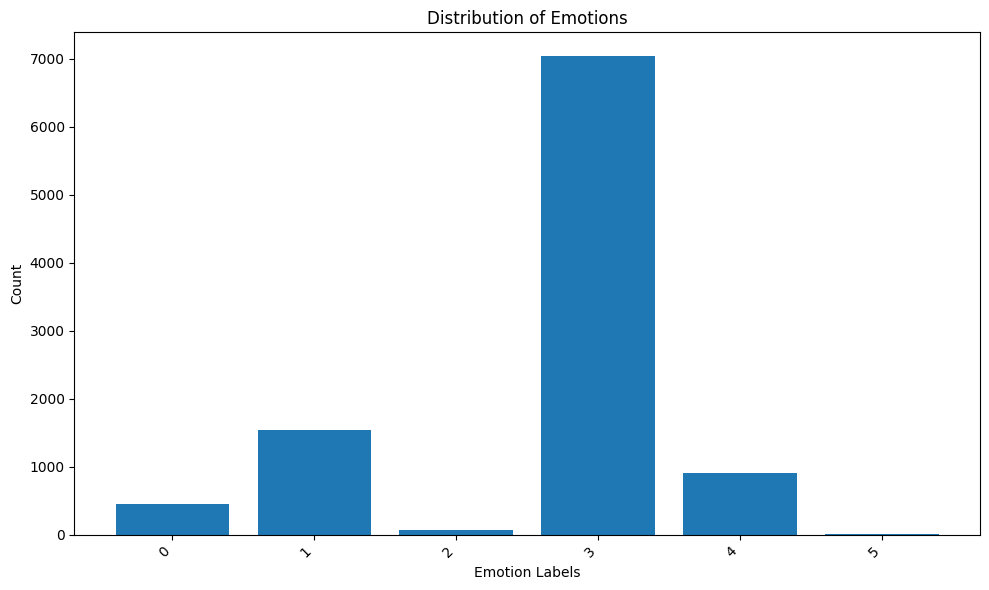

In [14]:
import pandas as pd
import tensorflow as tf
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Load the preprocessed data
data_df = pd.read_csv('/content/drive/MyDrive/RNN/preprocessed_bluesky2.csv')

# Load the saved tokenizer
with open('/content/drive/MyDrive/RNN/tokenizer1234.pkl', 'rb') as file:
    tokenizer = pickle.load(file)

# Load the saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/RNN/my_rnn_model1234.keras')
# Select the first 10000 entries
X_new = data_df['clean_text'][:10000].values

# Tokenize and pad the data
max_seq_length = 200  #same as model trained on
X_new_seq = tokenizer.texts_to_sequences(X_new)
X_new_seq = pad_sequences(X_new_seq, maxlen=max_seq_length)

# Make predictions
predictions = model.predict(X_new_seq)

# Get predicted labels
predicted_labels = [np.argmax(i) for i in predictions]

# Create a new DataFrame with the first 10000 entries and predictions
predicted_df = data_df[:10000].copy()  # Create a copy to avoid SettingWithCopyWarning
predicted_df['predicted_label'] = predicted_labels # Add predicted labels to this new DataFrame

# Count the occurrences of each emotion
emotion_counts = predicted_df['predicted_label'].value_counts()


# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(emotion_counts.index, emotion_counts.values)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion Labels')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

# Apply model to Bluesky (10000)


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step


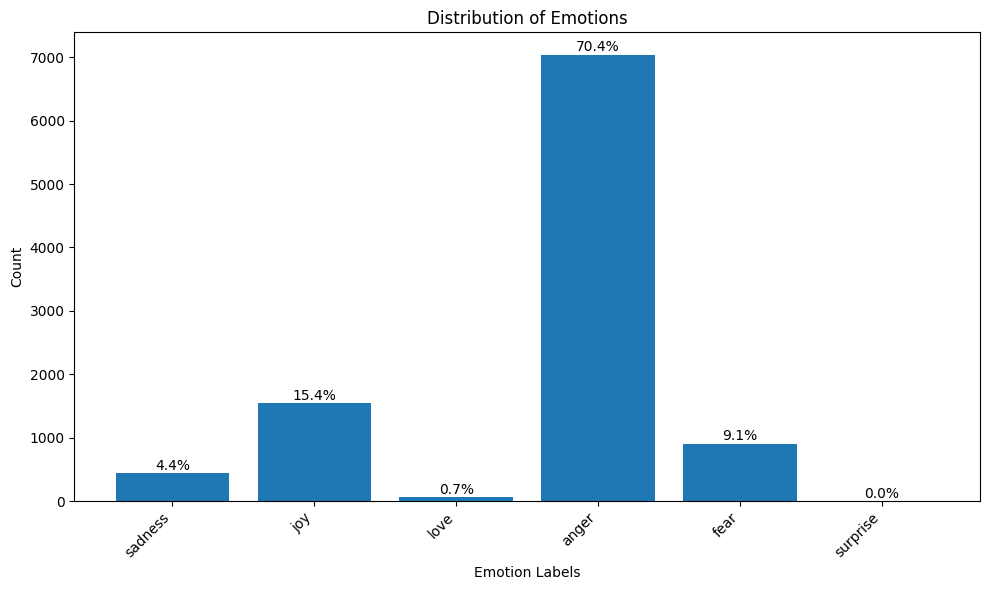

In [4]:
import pandas as pd
import tensorflow as tf
import pickle
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Load the preprocessed data
data_df = pd.read_csv('/content/drive/MyDrive/RNN/preprocessed_bluesky2.csv')

# Load the saved tokenizer
with open('/content/drive/MyDrive/RNN/tokenizer1234.pkl', 'rb') as file:
    tokenizer = pickle.load(file)

# Load the saved model
model = tf.keras.models.load_model('/content/drive/MyDrive/RNN/my_rnn_model1234.keras')
# Select the first 10000 entries
X_new = data_df['clean_text'][:10000].values

# Tokenize and pad the data
max_seq_length = 200  #same as model trained on
X_new_seq = tokenizer.texts_to_sequences(X_new)
X_new_seq = pad_sequences(X_new_seq, maxlen=max_seq_length)

# Make predictions
predictions = model.predict(X_new_seq)

# Get predicted labels
predicted_labels = [np.argmax(i) for i in predictions]

# Create a new DataFrame with the first 10000 entries and predictions
predicted_df = data_df[:10000].copy()  # Create a copy to avoid SettingWithCopyWarning
predicted_df['predicted_label'] = predicted_labels # Add predicted labels to this new DataFrame

# Count the occurrences of each emotion
emotion_counts = predicted_df['predicted_label'].value_counts()

# Calculate percentages
emotion_percentages = emotion_counts / emotion_counts.sum() * 100

# Emotion labels dictionary
labels_dict = {0: 'sadness', 1: 'joy', 2: 'love', 3: 'anger', 4: 'fear', 5: 'surprise'}

# Create a bar chart with percentages and emotion labels
plt.figure(figsize=(10, 6))
bars = plt.bar(emotion_counts.index, emotion_counts.values)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion Labels')
plt.ylabel('Count')
plt.xticks(emotion_counts.index, [labels_dict[i] for i in emotion_counts.index], rotation=45, ha='right')  # Set emotion labels on x-axis

# Add percentage labels above the bars
for bar, percentage in zip(bars, emotion_percentages):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 5, f'{percentage:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()